In [1]:
import pandas as pd
import numpy as np
from functools import reduce
idx = ['sepalLength','sepalWidth','petalLength','petalWidth','name', 'code']

In [2]:
df= pd.read_csv('D:\iris.csv',names=idx)
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,name,code
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,4.7,3.2,1.3,0.2,setosa,NaN
3,4.6,3.1,1.5,0.2,setosa,NaN
4,5.0,3.6,1.4,0.2,setosa,NaN


In [3]:
df = df.assign(code=0.0, weigth1=0.0, weigth2=0.0, weigth3=0.0, weigth4=0.0, bias=0.0, result=0.0, activation = 0.0, prediction = 0.0, error=0.0, dweigth1 = 0.0,
           dweigth2=0.0, dweigth3=0.0, dweigth4=0.0, dbias=0.0)

In [ ]:
df.info()

In [4]:
for i,j in enumerate(df.name):
    df.code[i] = 1.0 if j == 'setosa' else 0.0

C:\Users\annishafirdausy\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
section1 = df[:10].append(df[90:100],ignore_index=True)
section2 = df[10:20].append(df[80:90],ignore_index=True)
section3 = df[20:30].append(df[70:80],ignore_index=True)
section4 = df[30:40].append(df[60:70],ignore_index=True)
section5 = df[40:50].append(df[70:80],ignore_index=True)



In [6]:
training1 = pd.concat([section1,section2,section3,section4],ignore_index=True)
training2 = pd.concat([section2,section3,section4,section5],ignore_index=True)
training3 = pd.concat([section1,section3,section4,section5],ignore_index=True)
training4 = pd.concat([section1,section2,section4,section5],ignore_index=True)
training5 = pd.concat([section1,section2,section3,section5],ignore_index=True)

train= [training1,training2,training3,training4,training5]
validasi =[section5, section1, section2, section3,section4]

In [ ]:
validasi[1]

In [7]:
import math as m


In [8]:
def total(inp, weigth,bias,dbias):
    totalWeight = np.dot(inp,weigth)+(bias*dbias)
    return totalWeight

def activation(totalWeight):
    aktivasi= (1/(1+(m.exp(-totalWeight))))
    return aktivasi

def dt(x, act, target):
    turunan = 2*x*act*(act-target)*(1-act)
    return turunan

def error(act,target):
    error = (1/2*(pow((act-target),2))) 
    return error
def prediction(act):
    if (act>=0.5):
        return 1
    else:
        return 0

def newWeigth(weight, dt,lRate):
    return (weight-(lRate*dt))

def newBias(bias,dt,lRate):
    return (bias-(lRate*dt))

def accuration(pred, target):
  TP = 0.0
  TN = 0.0
  FP = 0.0
  FN = 0.0
  for i in range(20):
    if target[i] == 1.0 and pred[i] == 1.0:
      TP = TP + 1.0
    elif target[i] ==1.0 and pred[i] == 0.0:
      FN = FN + 1.0
    elif target[i] == 0.0 and pred[i] == 0.0:
      TN = TN + 1.0
    elif target[i] == 0.0 and pred[i] ==1.0:
      FP = FP + 1.0
  return ((TP+TN)/(TP+TN+FP+FN))
    


In [9]:
plot_error= np.zeros((5,5))
plot_accuracy= np.zeros((5,5))
plot_errorV= np.zeros((5,5))
plot_accuracyV= np.zeros((5,5))

for i in range (5):
    for j in range (5):
        for k in range (80):
            inp = [train[i]['sepalLength'][k],train[i]['sepalWidth'][k],train[i]['petalLength'][k],train[i]['petalWidth'][k]]
            if j==0 and k==0:
                weigth = [0.5, 0.5, 0.5, 0.5]
                train[i]['bias'][k]=0.5
                train[i]['weigth1'][k]=weigth[0]
                train[i]['weigth2'][k]=weigth[1]
                train[i]['weigth3'][k]=weigth[2]
                train[i]['weigth4'][k]=weigth[3]
                
                train[i]['result'][k]=total(inp,weigth,1,training1['bias'][k])
                train[i]['activation'][k]=activation(training1['result'][k])
                train[i]['prediction'][k]=prediction(training1['activation'][k])
                train[i]['error'][k]=error(training1['activation'][k],training1['code'][k])
                
                train[i]['dweigth1'][k]=dt(inp[0],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth2'][k]=dt(inp[1],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth3'][k]=dt(inp[2],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth4'][k]=dt(inp[3],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dbias'][k]=dt(1,train[i]['activation'][k],train[i]['code'][k])
                
            elif j>0 and k==0:
                weigth= [train[i]['weigth1'][k],train[i]['weigth2'][k],train[i]['weigth3'][k],train[i]['weigth4'][k]]

                train[i]['weigth1'][k]= newWeigth(train[i]['weigth1'][79],train[i]['dweigth1'][79],0.8)
                train[i]['weigth2'][k]= newWeigth(train[i]['weigth2'][79],train[i]['dweigth2'][79],0.8)
                train[i]['weigth3'][k]= newWeigth(train[i]['weigth3'][79],train[i]['dweigth3'][79],0.8)
                train[i]['weigth4'][k]= newWeigth(train[i]['weigth4'][79],train[i]['dweigth4'][79],0.8)
                train[i]['bias'][k]=newBias(train[i]['bias'][79],train[i]['dbias'][79],0.8)
                
                train[i]['result'][k]=total(inp,weigth,1,training1['bias'][k])
                train[i]['activation'][k]=activation(training1['result'][k])
                train[i]['prediction'][k]=prediction(training1['activation'][k])
                train[i]['error'][k]=error(training1['activation'][k],training1['code'][k])
                
                train[i]['dweigth1'][k]=dt(inp[0],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth2'][k]=dt(inp[1],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth3'][k]=dt(inp[2],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth4'][k]=dt(inp[3],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dbias'][k]=dt(1,train[i]['activation'][k],train[i]['code'][k])
           
            elif k>0:
                weigth= [train[i]['weigth1'][k],train[i]['weigth2'][k],train[i]['weigth3'][k],train[i]['weigth4'][k]]

                train[i]['weigth1'][k]= newWeigth(train[i]['weigth1'][k-1],train[i]['dweigth1'][k-1],0.8)
                train[i]['weigth2'][k]= newWeigth(train[i]['weigth2'][k-1],train[i]['dweigth2'][k-1],0.8)
                train[i]['weigth3'][k]= newWeigth(train[i]['weigth3'][k-1],train[i]['dweigth3'][k-1],0.8)
                train[i]['weigth4'][k]= newWeigth(train[i]['weigth4'][k-1],train[i]['dweigth4'][k-1],0.8)
                train[i]['bias'][k]=newBias(train[i]['bias'][k-1],train[i]['dbias'][k-1],0.8)
                
                train[i]['result'][k]=total(inp,weigth,1,training1['bias'][k])
                train[i]['activation'][k]=activation(training1['result'][k])
                train[i]['prediction'][k]=prediction(training1['activation'][k])
                train[i]['error'][k]=error(training1['activation'][k],training1['code'][k])
                
                train[i]['dweigth1'][k]=dt(inp[0],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth2'][k]=dt(inp[1],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth3'][k]=dt(inp[2],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dweigth4'][k]=dt(inp[3],train[i]['activation'][k],train[i]['code'][k])
                train[i]['dbias']=dt(1,train[i]['activation'][k],train[i]['code'][k])
                
            plot_error[i][j]=((sum(train[i]['error']))/80)
            plot_accuracy[i][j]=accuration(train[i]['prediction'],train[i]['code'])
                
        for l in range(20):
            Inp = [validasi[i]['sepalLength'][l],validasi[i]['sepalWidth'][l],validasi[i]['petalLength'][l],validasi[i]['petalWidth'][l]]
            Weigth= [train[i]['weigth1'][k],train[i]['weigth2'][k],train[i]['weigth3'][k],train[i]['weigth4'][k]]

            validasi[i]['weigth1'][l]= Weigth[0]
            validasi[i]['weigth2'][l]= Weigth[1]
            validasi[i]['weigth3'][l]= Weigth[2]
            validasi[i]['weigth4'][l]= Weigth[3]

            validasi[i]['result'][l]=total(Inp,Weigth,1,validasi[i]['bias'][l])
            validasi[i]['activation'][l]=activation(validasi[i]['result'][l])
            validasi[i]['prediction'][l]=prediction(validasi[i]['activation'][l])
            validasi[i]['error'][l]=error(validasi[i]['activation'][l],train[i]['code'][l])
            
        plot_errorV[i][j]=((sum(validasi[i]['error']))/20)
        plot_accuracyV[i][j]=accuration(validasi[i]['prediction'],validasi[i]['code'])
                

C:\Users\annishafirdausy\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\annishafirdausy\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\annishafirdausy\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\annishafirdausy\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying

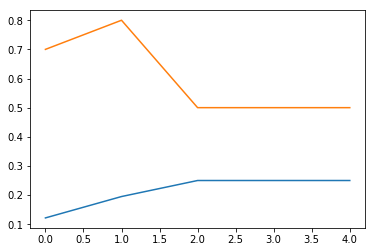

In [14]:
import matplotlib.pyplot as plt
#grapich 1 training
plt.plot(plot_error[0])
plt.plot(plot_accuracy[0])
plt.show()


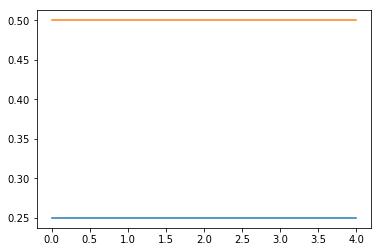

In [15]:

#grapich 3 training
plt.plot(plot_error[2])
plt.plot(plot_accuracy[2])
plt.show()


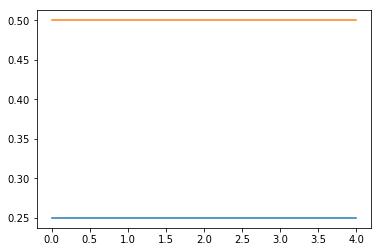

In [16]:
#grapich 4 training
plt.plot(plot_error[3])
plt.plot(plot_accuracy[3])
plt.show()

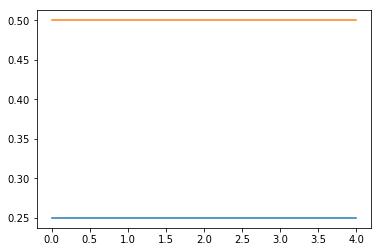

In [17]:
#grapich 1 validasi
plt.plot(plot_errorV[0])
plt.plot(plot_accuracyV[0])
plt.show()

